<a href="https://colab.research.google.com/github/Bigdata92/Python_For_DA/blob/master/Python_For_DA_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.3 배열을 이용한 배열지향 프로그래밍

### 벡터화: 배열 연산을 사용, 반복문을 명시적 제거


### np.meshgrid: 두개의 1차원 배열을 받아 가능한 모든 (x, y)짝 2차원 배열 2개 반환

In [2]:
import numpy as np

points = np.arange(-5, 5, 0.01)

xs, ys = np.meshgrid(points, points)

ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

###  그리드 상의 두 포인트로 간단하게 계산 적용




In [3]:
z = np.sqrt(xs ** 2 + ys ** 2)

z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

### matplotlib 이용하여 2차원 배열 시각화

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a gird of values')

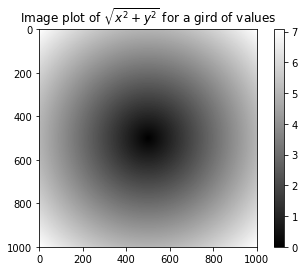

In [5]:
import matplotlib.pyplot as plt 

plt.imshow(z, cmap = plt.cm.gray);

plt.colorbar()

plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a gird of values")

# 4.3.1 배열 연산으로 조건절 표현 
### numpy.where : 삼항식의 벡터화(x if 조건 else y)


In [0]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

In [13]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

result

[1.1, 2.2, 1.3, 1.4, 2.5]

### list comprehension문제점 
### 

1.   큰 배열 빠르게 처리 X
2.   다차원 배열 사용 X



In [14]:
result = np.where(cond, xarr, yarr)

result

array([1.1, 2.2, 1.3, 1.4, 2.5])

### np.where의 2,3 번째 인자 배열 X 상관 X
### where : 다른 배열에 기반한 새로운 배열 생성

In [16]:
arr = np.random.randn(4,4)

arr

array([[ 1.26764224,  1.00586137, -2.58882534,  0.78812871],
       [-1.27216908, -0.57507728, -1.00078697,  1.4177798 ],
       [ 0.48272792,  0.19036843,  1.69703361, -0.24523342],
       [ 0.08778832,  0.08274331,  1.26587997,  0.46215939]])

In [17]:
arr > 0

array([[ True,  True, False,  True],
       [False, False, False,  True],
       [ True,  True,  True, False],
       [ True,  True,  True,  True]])

In [18]:
np.where(arr > 0, 2, -2)

array([[ 2,  2, -2,  2],
       [-2, -2, -2,  2],
       [ 2,  2,  2, -2],
       [ 2,  2,  2,  2]])

In [19]:
np.where(arr > 0, 2, arr) ### np.where 스칼라,배열 조합 가능

array([[ 2.        ,  2.        , -2.58882534,  2.        ],
       [-1.27216908, -0.57507728, -1.00078697,  2.        ],
       [ 2.        ,  2.        ,  2.        , -0.24523342],
       [ 2.        ,  2.        ,  2.        ,  2.        ]])

# 4.3.2 수학메서드와 통계메서드
### 수학함수 : 배열 메서드 사용가능

In [20]:
arr = np.random.randn(5, 4) # 임의의 정규 분포 데이터 생성 및 집계

arr

array([[ 0.66372518, -0.30583132,  0.00200025, -1.66643409],
       [ 1.74122391,  0.31714216,  1.26444809, -0.15161117],
       [ 0.31420765,  0.55722041,  1.2501629 , -1.39691334],
       [-0.50505727,  1.29668461, -1.35094693, -0.50800754],
       [-0.38613814,  0.59485824,  1.0362752 , -0.02535487]])

In [21]:
arr.mean()

0.1370826971129299

In [22]:
np.mean(arr)

0.1370826971129299

In [23]:
arr.sum()

2.7416539422585977

### mean, sum : 선택적 axis인자 받아서 axis 통계 계산 및 한 차수 낮은 배열 반환

In [24]:
arr.mean(axis = 1) # row의 합

array([-0.326635  ,  0.79280075,  0.1811694 , -0.26683178,  0.30491011])

In [25]:
arr.sum(axis = 0) # 모든 column 평균

array([ 1.82796134,  2.46007409,  2.20193952, -3.748321  ])

### cumsum : 누적함수

In [27]:
arr = np.arange(0, 8, 1)

arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [28]:
arr = np.array([[0, 1, 2], [3, 4, 5,], [6, 7, 8]])

arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [29]:
arr.cumsum(axis = 0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

### cumprod : 누적곱 함수

In [30]:
arr.cumprod(axis = 1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

# 4.3.5 집합 관련 함수
### np.unique : 배열 내 중복된 원소 제거 및 남은 원소 정렬 형태로 반환

In [32]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [33]:
ints = np.array([3,3,3,2,2,1,1,4,4])

np.unique(ints)

array([1, 2, 3, 4])

In [36]:
sorted(set(names)) # 파이썬만으로 np.unique() 구현

['Bob', 'Joe', 'Will']

### np.in1d : 두 개의 배열 인자로 받아, 첫 번째 배열의 원소가 두 번째 배열의 원소를 포함하는지 나타내는 불리언 배열

In [38]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

###unique(x) : 중복 원소 제거 후 반환
###intersect1d(x, y) : 공통 원소 반환 
###union1d(x, y) : 합집합 반환
###in1d(x, y) : x의 원소가 y의 원소에 포함되는지 불리언 반환
###setdiff1d(x, y) : x와y의 차집합 반환
###setxor1d(x, y) : 대칭차집합 반환